# Clustering and Dimensionality Reduction

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score, adjusted_rand_score
sns.set_style("whitegrid")

## Load Data

In [2]:
data = load_breast_cancer()
X, y = data.data, data.target
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## 1. PCA

Explained variance: 0.6324


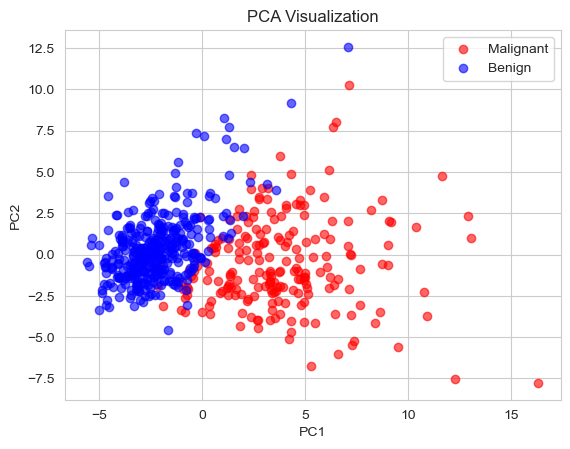

In [3]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
print(f"Explained variance: {pca.explained_variance_ratio_.sum():.4f}")
plt.scatter(X_pca[y == 0, 0], X_pca[y == 0, 1], c='red', label='Malignant', alpha=0.6)
plt.scatter(X_pca[y == 1, 0], X_pca[y == 1, 1], c='blue', label='Benign', alpha=0.6)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Visualization')
plt.legend()
plt.show()

## 2. t-SNE

In [ ]:
X_subset = X_scaled[:300]
y_subset = y[:300]
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X_subset)
plt.scatter(X_tsne[y_subset == 0, 0], X_tsne[y_subset == 0, 1], c='red', label='Malignant', alpha=0.6)
plt.scatter(X_tsne[y_subset == 1, 0], X_tsne[y_subset == 1, 1], c='blue', label='Benign', alpha=0.6)
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.title('t-SNE Visualization')
plt.legend()
plt.show()

## 3. K-Means

In [4]:
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_scaled)
silhouette = silhouette_score(X_scaled, kmeans_labels)
ari = adjusted_rand_score(y, kmeans_labels)
print(f"Silhouette Score: {silhouette:.4f}")
print(f"Adjusted Rand Index: {ari:.4f}")

Silhouette Score: 0.3434
Adjusted Rand Index: 0.6536


## 4. Hierarchical Clustering

In [5]:
X_subset = X_scaled[:200]
y_subset = y[:200]
hierarchical = AgglomerativeClustering(n_clusters=2)
hierarchical_labels = hierarchical.fit_predict(X_subset)
silhouette = silhouette_score(X_subset, hierarchical_labels)
ari = adjusted_rand_score(y_subset, hierarchical_labels)
print(f"Silhouette Score: {silhouette:.4f}")
print(f"Adjusted Rand Index: {ari:.4f}")

Silhouette Score: 0.2302
Adjusted Rand Index: 0.6874


## 5. DBSCAN

In [6]:
X_subset = X_scaled[:200]
dbscan = DBSCAN(eps=3, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_subset)
n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_noise = list(dbscan_labels).count(-1)
print(f"Number of clusters: {n_clusters}")
print(f"Number of noise points: {n_noise}")

Number of clusters: 1
Number of noise points: 72


## Results Analysis

- **PCA (Explained variance ≈ 0.63)**
  - The first two principal components already explain about 63% of the total variance, and the scatter plot shows a clear separation between malignant and benign clusters.
  - However, there is still noticeable overlap along the boundary region, which matches the fact that the problem is not perfectly linearly separable even after scaling.
- **K-Means (ARI ≈ 0.65, Silhouette ≈ 0.34)**
  - ARI around 0.65 indicates that K-Means recovers much of the true label structure, but not perfectly; some malignant and benign samples are assigned to the wrong cluster.
  - The moderate silhouette score (0.34) suggests that clusters are fairly compact but still have points near the decision boundary, which is consistent with the overlapping region visible in PCA.
- **Hierarchical Clustering (ARI ≈ 0.69, Silhouette ≈ 0.23)**
  - A slightly higher ARI than K-Means means the hierarchical algorithm aligns a bit better with the ground-truth labels on this dataset.
  - The lower silhouette score (0.23) implies that, although labels match better globally, many samples lie in ambiguous areas where cluster cohesion/separation is weaker.
  - This reflects the fact that agglomerative clustering with a fixed number of clusters can adapt to the unbalanced class sizes (benign > malignant) differently from K-Means, which tends to create clusters of similar size.
- **DBSCAN (1 cluster, 72 noise points)**
  - With the chosen parameters (`eps=3`, `min_samples=5`), DBSCAN fails to find meaningful structure: it treats almost all points as a single dense cluster and flags 72 points as noise.
  - This indicates that the density contrast between malignant and benign regions is not strong enough for DBSCAN at this scale; the two classes differ more by direction (along PCs) than by absolute density.
- **Overall insight**
  - The breast cancer data has a **strong but not perfect** cluster structure: linear projections (PCA) and centroid-based methods (K-Means) can see the two groups, but boundary samples remain hard.
  - Clustering alone is therefore useful for visualization and rough grouping, but supervised classifiers are still needed to reach the very high accuracies observed in the classification notebooks.
